#Data Collection and Pre-Processing

###Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

##Data Collection

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv('/content/drive/MyDrive/DATA_MINING/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv', sep='|')

In [12]:
# df.to_csv('output_data.csv', index=False)

In [13]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,CUyBg1WA04SBmf3ah,192.168.100.103,43763.0,16.219.83.137,64906.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008744,1.526283e+09,CvaIoX2b9VynuYieBf,192.168.100.103,43763.0,100.57.245.196,39435.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008745,1.526283e+09,CVHrUzIUN0mW5lQsl,192.168.100.103,43763.0,249.99.119.9,26169.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008746,1.526283e+09,CkGlnL2pxzlusrFlLj,192.168.100.103,43763.0,205.103.167.192,18241.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,CUyBg1WA04SBmf3ah,192.168.100.103,43763.0,16.219.83.137,64906.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008744,1.526283e+09,CvaIoX2b9VynuYieBf,192.168.100.103,43763.0,100.57.245.196,39435.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008745,1.526283e+09,CVHrUzIUN0mW5lQsl,192.168.100.103,43763.0,249.99.119.9,26169.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008746,1.526283e+09,CkGlnL2pxzlusrFlLj,192.168.100.103,43763.0,205.103.167.192,18241.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-


##Data Cleaning

In [14]:
#Checking na values
df.isna().sum()

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
tunnel_parents    0
label             0
detailed-label    0
dtype: int64

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
tunnel_parents    0
label             0
detailed-label    0
dtype: int64

We don't have na values in our dataset but we have '-'values in our data which is null

In [15]:
# Checking all the unique values in the data
col = df.columns
for i in col:
  print(f"Total unique values sum for column {i} is:")
  print(df[i].value_counts())

Total unique values sum for column ts is:
1.525880e+09    1
1.526138e+09    1
1.526138e+09    1
1.526138e+09    1
1.526138e+09    1
               ..
1.526007e+09    1
1.526007e+09    1
1.526007e+09    1
1.526007e+09    1
1.526283e+09    1
Name: ts, Length: 1008748, dtype: int64
Total unique values sum for column uid is:
CUmrqr4svHuSXJy5z7    1
COj4Eq4lmR86amgfI6    1
CBqL9l4KOG0Y3zauml    1
CLIXVIOgCuf9Pv6j      1
CImdWC3kB3Zhudx4q3    1
                     ..
CIEU4w1lSTwgbUFwHe    1
CaXPwRJbmRa0E2N32     1
CHMbUQ2DPEF61n2Chf    1
CwWZ3m2uWO6qokLuu4    1
CoOjVZ1zw3pWf7a9n5    1
Name: uid, Length: 1008748, dtype: int64
Total unique values sum for column id.orig_h is:
192.168.100.103    991061
192.168.100.1        1651
4.68.110.10            43
194.70.98.42           23
218.248.235.161        13
                    ...  
203.233.35.193          1
84.61.235.57            1
209.180.197.181         1
119.166.138.30          1
255.176.39.22           1
Name: id.orig_h, Length: 15004, dtype

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1008748 non-null  float64
 1   uid             1008748 non-null  object 
 2   id.orig_h       1008748 non-null  object 
 3   id.orig_p       1008748 non-null  float64
 4   id.resp_h       1008748 non-null  object 
 5   id.resp_p       1008748 non-null  float64
 6   proto           1008748 non-null  object 
 7   service         1008748 non-null  object 
 8   duration        1008748 non-null  object 
 9   orig_bytes      1008748 non-null  object 
 10  resp_bytes      1008748 non-null  object 
 11  conn_state      1008748 non-null  object 
 12  local_orig      1008748 non-null  object 
 13  local_resp      1008748 non-null  object 
 14  missed_bytes    1008748 non-null  float64
 15  history         1008748 non-null  object 
 16  orig_pkts       1008748 non-null  fl

**Observation(Data Understanding)**

a)--> Columns ts(timestamps) and uid(unique id ) contains all the unique values which will not be usefull for our model.

b)--> Most of the columns contains 0.0 in many of the instances the instances.

c)-->All the columns which contains "-" in their column are null.

d)-->Column 'detailed-label' is the part of our target variable we will not consider this variable.


###Missing Values Handling

In [17]:
#a)Dropping ts and uid
df = df.drop(columns=['ts','uid'])

In [18]:
#b) Further working for columns which contains 0.0
missing_val_col = []

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains 0.0
    if 0.0 in df[column].unique():
        missing_val_col.append(column)

# Print the list of column names that contain 0.0
print("Columns with 0.0 ")
print(missing_val_col)

Columns with 0.0 
['id.resp_p', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']


In [19]:
# Initialize a dictionary to store the percentage of 0.0 values for each column
percentage_dict = {}

# Calculate the percentage of "-" values for each column
for column in missing_val_col:
    percentage = (df[column] == 0.0).mean() * 100
    percentage_dict[column] = percentage

# Print the percentage of "-" values for each column
for column, percentage in percentage_dict.items():
    print(f"Column '{column}' has {percentage:.2f}% 0.0 values.")

Column 'id.resp_p' has 0.33% 0.0 values.
Column 'missed_bytes' has 100.00% 0.0 values.
Column 'orig_pkts' has 0.00% 0.0 values.
Column 'orig_ip_bytes' has 0.00% 0.0 values.
Column 'resp_pkts' has 98.03% 0.0 values.
Column 'resp_ip_bytes' has 98.03% 0.0 values.


In [20]:
# Dropping all the columns which higher amount of 0.0 values
df = df.drop(columns=['missed_bytes','resp_pkts','resp_ip_bytes'])

In [21]:
#c) Further working for columns which contains "-"
missing_val_col_2 = []

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains "-"
    if '-' in df[column].unique():
        missing_val_col_2.append(column)

# Print the list of column names that contain "-"
print("Columns with '-' character:")
print(missing_val_col_2)

<ipython-input-21-eaf727ef3804>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '-' in df[column].unique():


Columns with '-' character:
['service', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp', 'history', 'tunnel_parents', 'detailed-label']


In [22]:
# Initialize a dictionary to store the percentage of "-" values for each column
percentage_dict_2 = {}

# Calculate the percentage of "-" values for each column
for column in missing_val_col_2:
    percentage = (df[column] == '-').mean() * 100
    percentage_dict_2[column] = percentage

# Print the percentage of "-" values for each column
for column, percentage in percentage_dict_2.items():
    print(f"Column '{column}' has {percentage:.2f}% '-' values.")

Column 'service' has 99.68% '-' values.
Column 'duration' has 78.94% '-' values.
Column 'orig_bytes' has 78.94% '-' values.
Column 'resp_bytes' has 78.94% '-' values.
Column 'local_orig' has 100.00% '-' values.
Column 'local_resp' has 100.00% '-' values.
Column 'history' has 1.73% '-' values.
Column 'tunnel_parents' has 100.00% '-' values.
Column 'detailed-label' has 46.52% '-' values.


Dropping all the columns contains "-" and 0.0 values except 'history'

In [23]:
# Dropping all the columns which have "-" values

# Keep only the "history" column and drop all other columns in 'missing_val_col'
columns_to_drop = [col for col in missing_val_col_2 if col != "history"]
df = df.drop(columns=columns_to_drop)

# Now 'df' will contain only the "history" column

###Imputing value

In [24]:
# Calculate the mode of the "history" column
mode_value = df['history'].mode().iloc[0]

# Replace "-" values with the mode
df['history'].replace('-', mode_value, inplace=True)

###Basic EDA

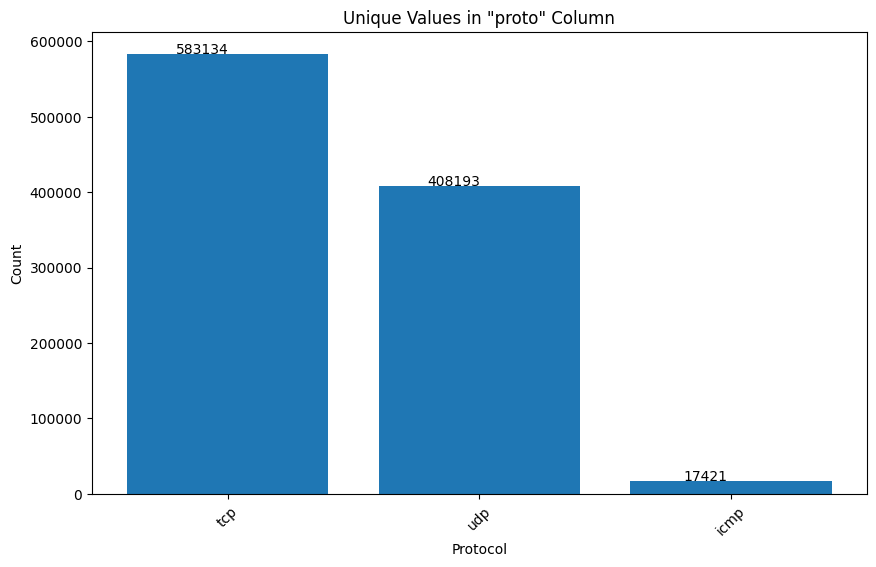

In [25]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a 'proto' column

# Get unique values in the 'proto' column
unique_values = df['proto'].unique()

# Count the occurrences of each unique value
value_counts = df['proto'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_values, value_counts)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Unique Values in "proto" Column')
plt.xticks(rotation=45)

# Add values on top of the bars
for bar, value in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.2, value, ha='center')

plt.show()


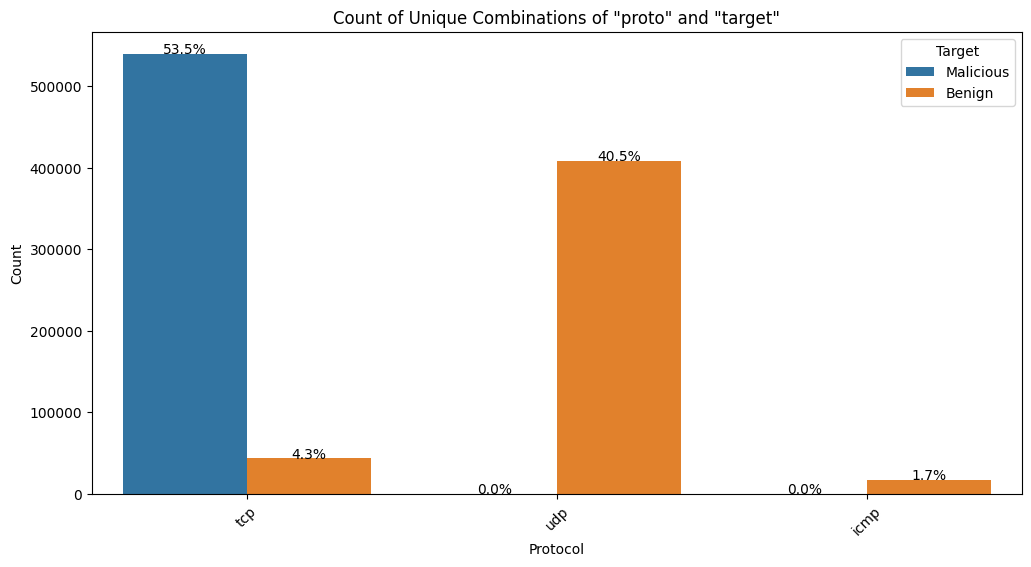

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'proto' and 'target' columns

# Create a bar plot showing the count of each unique combination of 'proto' and 'target'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='proto', hue='label')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Count of Unique Combinations of "proto" and "target"')
plt.xticks(rotation=45)
plt.legend(title='Target', loc='upper right')

# Annotate each bar with the percentage value
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format(height / total * 100), ha="center")

plt.show()


**Observation**

--> This shows that if we take this column we will be geting the following result:

1. Our model will give us our network is Benign with 100% accuracy for udp and icmp.

2. For tcp as data is imbalance our model predict it as a malicious if we give as input as a prototype="tcp".




In [27]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,label
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,S,3.0,180.0,Malicious
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,S,1.0,60.0,Malicious
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,S,1.0,60.0,Malicious
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,S,3.0,180.0,Malicious
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,S,1.0,60.0,Malicious
...,...,...,...,...,...,...,...,...,...,...
1008743,192.168.100.103,43763.0,16.219.83.137,64906.0,udp,S0,D,1.0,40.0,Benign
1008744,192.168.100.103,43763.0,100.57.245.196,39435.0,udp,S0,D,1.0,40.0,Benign
1008745,192.168.100.103,43763.0,249.99.119.9,26169.0,udp,S0,D,1.0,40.0,Benign
1008746,192.168.100.103,43763.0,205.103.167.192,18241.0,udp,S0,D,1.0,40.0,Benign


##Encoding

In [28]:
encoder = LabelEncoder()

# extract categorical attributes
cat_df = df.select_dtypes(include=['object']).copy()

# encode the categorical attributes
for column in cat_df.columns:
    df[column] = encoder.fit_transform(df[column])

In [29]:
# Attack Class Distribution
df['label'].value_counts()

1    539473
0    469275
Name: label, dtype: int64

To find important features for further machine learning modeling, we can use feature selection techniques or tree-based algorithms that provide feature importance scores.

##Feature Engineering

###Correlation matrix

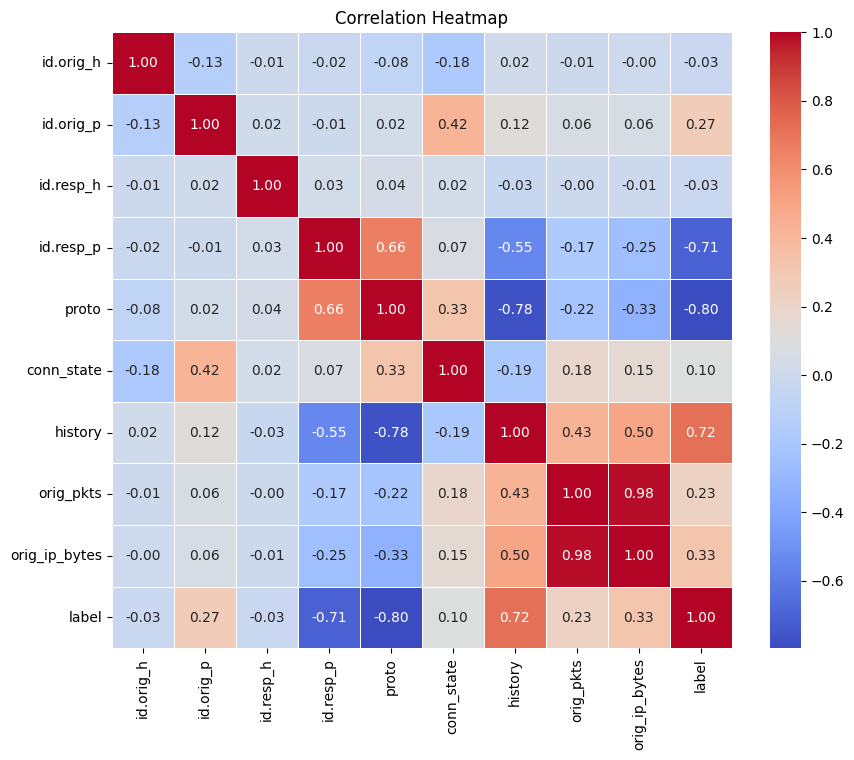

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()




### Feature importance

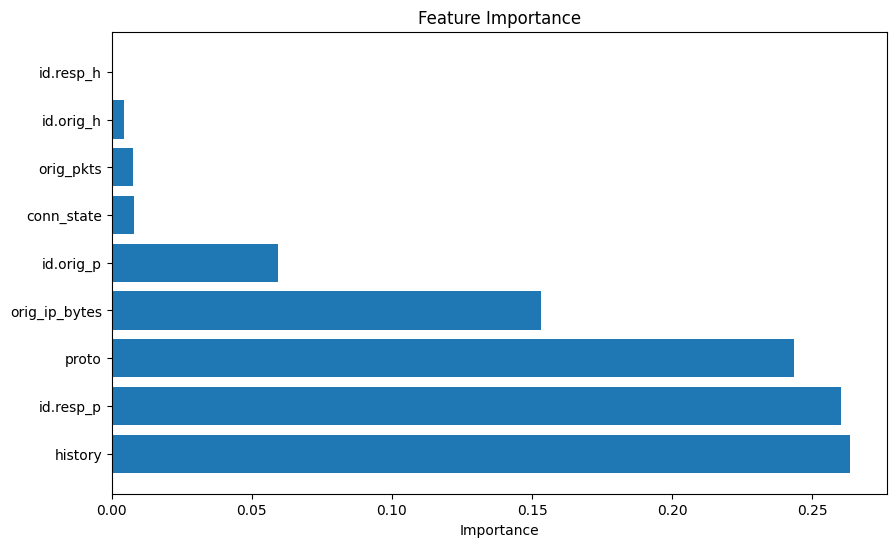

In [39]:
# Separate the features and the target variable
X = df.drop('label', axis=1)
y = df['label']

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns,
                                      'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')

# Show the plot
plt.show()

**Proto, history and id.resp_p are all intercorrelated so we are only taking history as input**

###Prediction using all the important features

In [24]:
# X = df.drop('label', axis=1)

In [31]:
# Separate the features and the target variable
# X = df.drop('label', axis=1)
X = df.drop(['label','proto','id.resp_p'], axis=1)
y = df['label']

In [32]:
X

,id.orig_h,id.orig_p,id.resp_h,conn_state,history,orig_pkts,orig_ip_bytes
0,6478,51524.0,501746,6,21,3.0,180.0
1,6478,56305.0,496872,6,21,1.0,60.0
2,6478,41101.0,36215,6,21,1.0,60.0
3,6478,60905.0,88035,6,21,3.0,180.0
4,6478,44301.0,576062,6,21,1.0,60.0
...,...,...,...,...,...,...,...
1008743,6478,43763.0,165796,6,1,1.0,40.0
1008744,6478,43763.0,7220,6,1,1.0,40.0
1008745,6478,43763.0,389190,6,1,1.0,40.0
1008746,6478,43763.0,293502,6,1,1.0,40.0


##Data Splitting

In [34]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the feature data (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Building and Model Training

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Create a list of classifiers without hyperparameter tuning
classifiers = [
    {
        "name": "Logistic Regression",
        "model": LogisticRegression(),
    },
    {
        "name": "Decision Tree",
        "model": DecisionTreeClassifier(),
    },

    {
        "name": "K-Nearest Neighbors",
        "model": KNeighborsClassifier(),
    }
]

# Loop through each classifier
for classifier_info in classifiers:
    name = classifier_info["name"]
    model = classifier_info["model"]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)

    # Perform cross-validation to assess model performance
    cross_val_scores = cross_val_score(model, X, y, cv=5)
    mean_score = np.mean(cross_val_scores)
    print(f"Cross-Validation Mean Accuracy: {mean_score:.2f}\n")


Classifier: Logistic Regression
Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     93852
           1       0.93      1.00      0.96    107898

    accuracy                           0.96    201750
   macro avg       0.96      0.95      0.96    201750
weighted avg       0.96      0.96      0.96    201750

Cross-Validation Mean Accuracy: 0.95

Classifier: Decision Tree
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     93852
           1       0.99      0.99      0.99    107898

    accuracy                           0.99    201750
   macro avg       0.99      0.99      0.99    201750
weighted avg       0.99      0.99      0.99    201750

Cross-Validation Mean Accuracy: 0.92

Classifier: K-Nearest Neighbors
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     93852
           1       0.93   

**Decision Tree works better but there might be overfitting so will use Random forest in the overfitting case and tune our model using hyperparameters.**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Create a Random Forest classifier
# random_forest_classifier = RandomForestClassifier()

# # Define a set of hyperparameters and their possible values to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a GridSearchCV object to find the best hyperparameters
# grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5, n_jobs=-1)

# # Fit the GridSearchCV on the training data
# grid_search.fit(X_train, y_train)

# # Get the best Random Forest model with the optimized hyperparameters
# best_random_forest = grid_search.best_estimator_

# # Make predictions on the testing data using the best model
# y_pred_rf = best_random_forest.predict(X_test)

# # Calculate accuracy and generate a classification report
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# report_rf = classification_report(y_test, y_pred_rf)

# print("Random Forest Classifier (with Hyperparameter Tuning)")
# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"Accuracy: {accuracy_rf:.2f}")
# print(report_rf)

# # Perform cross-validation to assess the performance of the best model
# cross_val_scores_rf = cross_val_score(best_random_forest, X, y, cv=5)
# mean_score_rf = np.mean(cross_val_scores_rf)
# print(f"Cross-Validation Mean Accuracy (Random Forest): {mean_score_rf:.2f}")


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


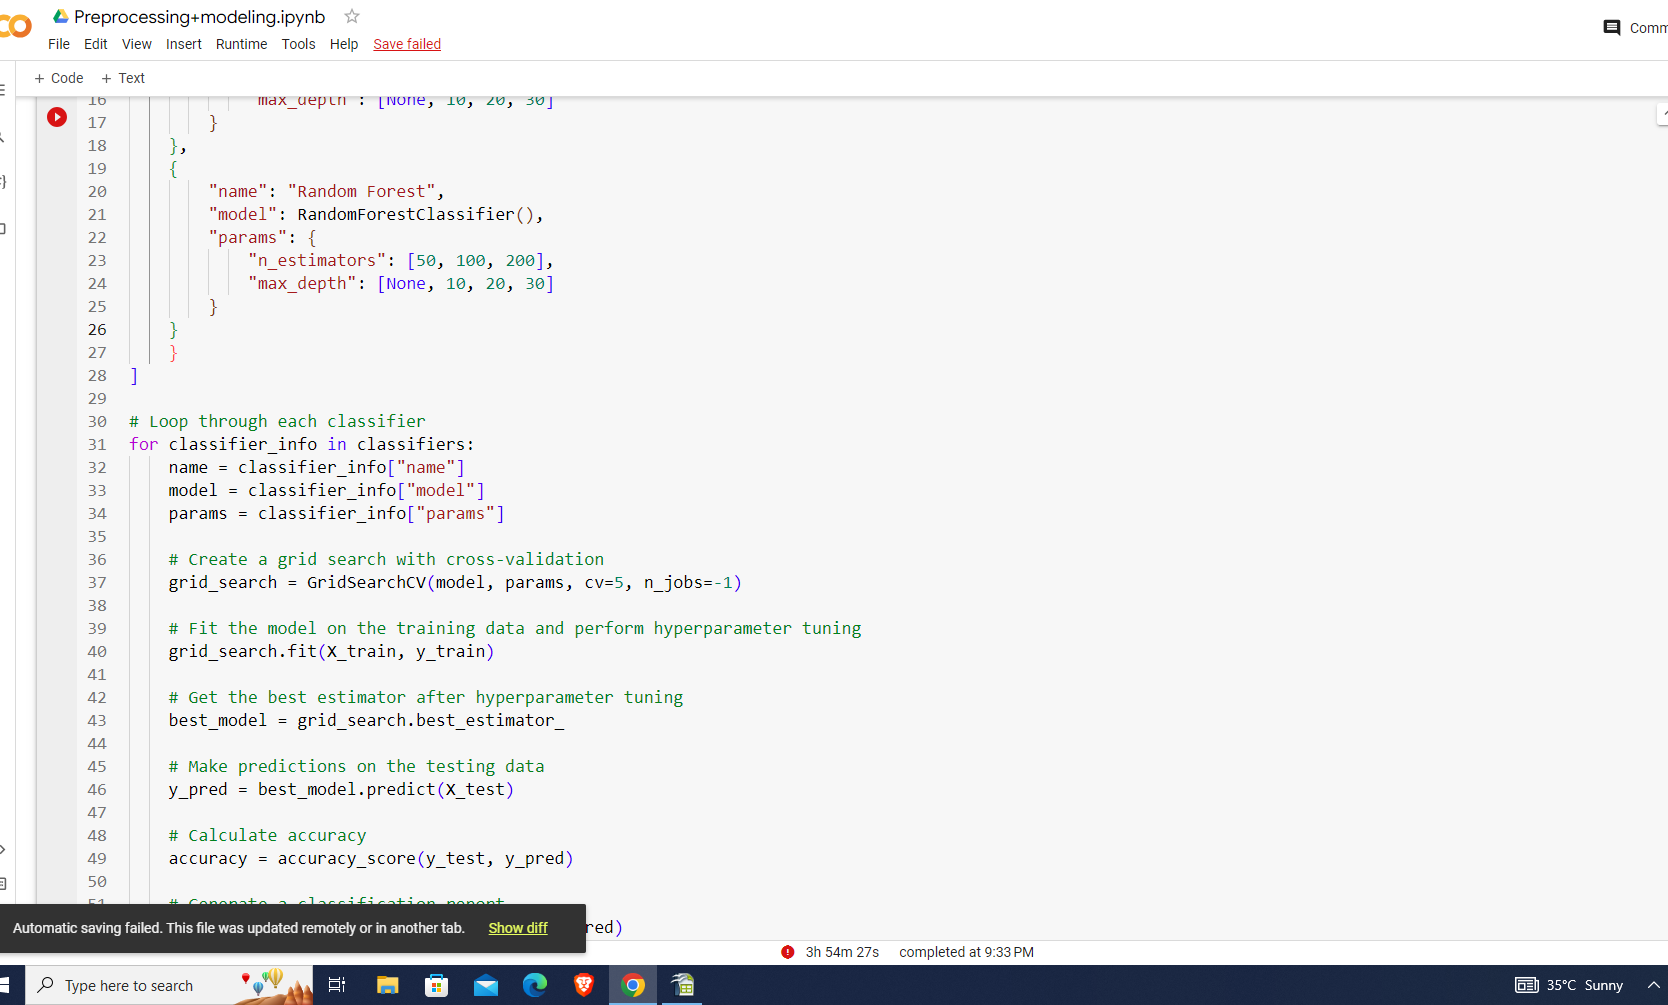

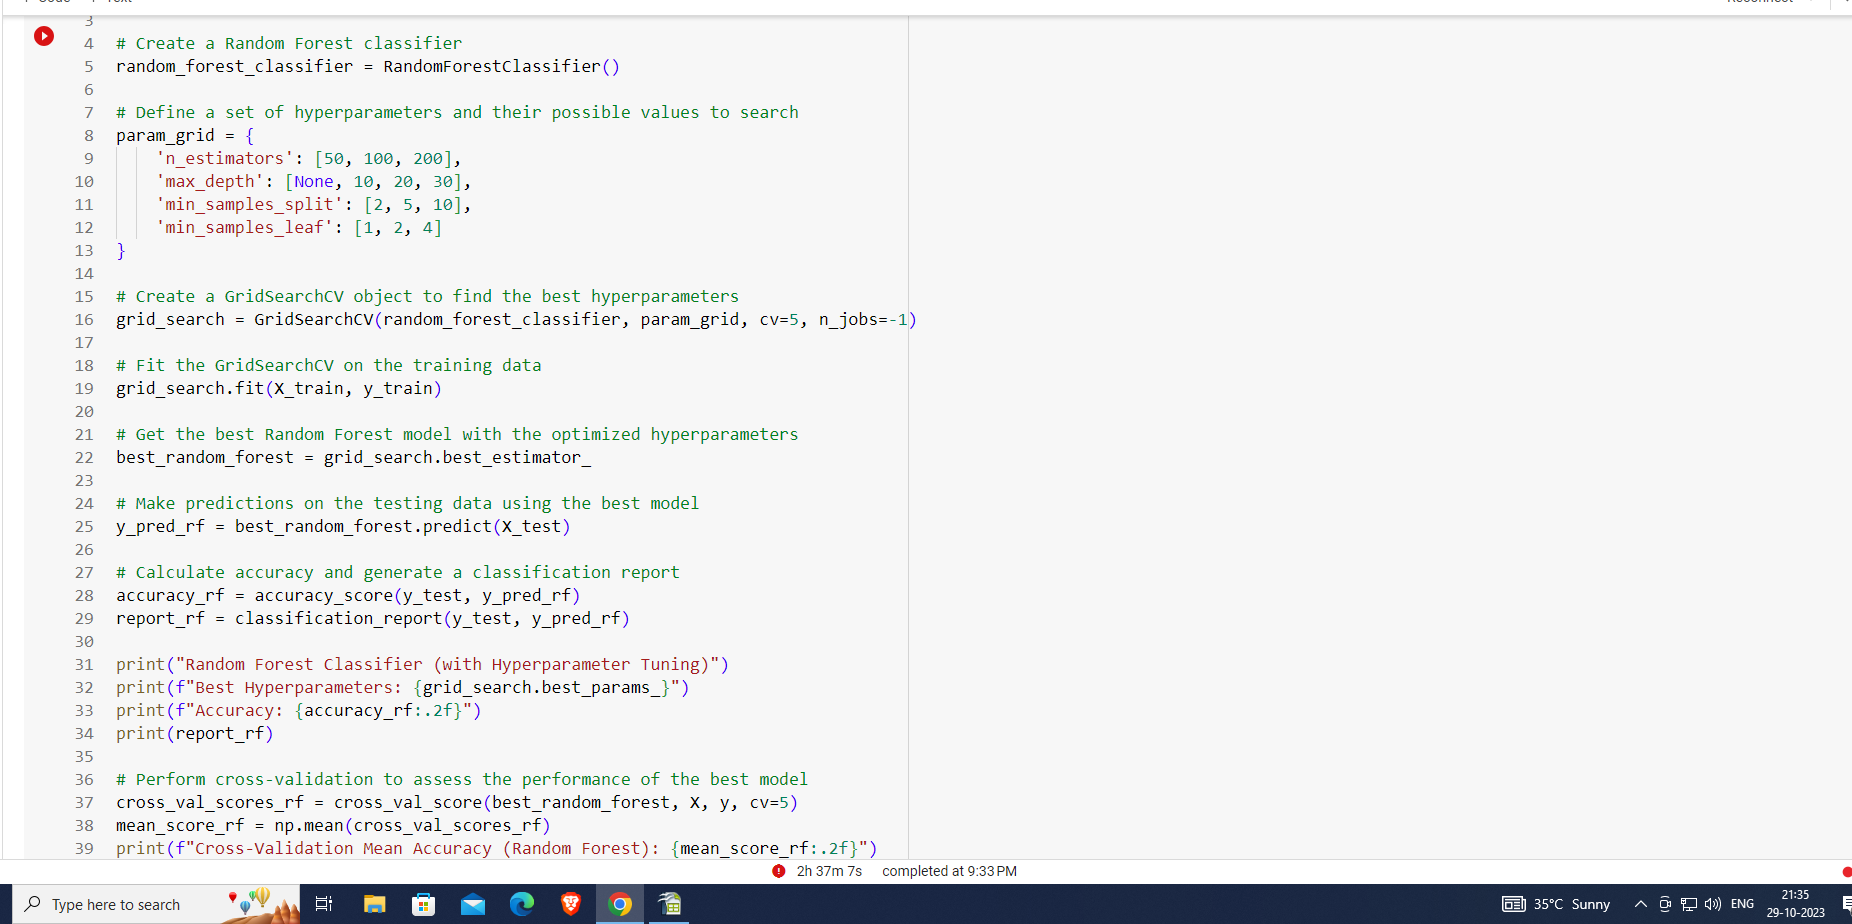

We have tried to train our model using Random Forest which will overcome the problem of overfitting and we have set some hyperparameters but because of the computational complexity it is taking too much time to run our model. So we will consider logistic regression.

After 3-4 hour our code has automatically stopped

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Define a smaller set of hyperparameters and their possible values to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2']
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best Logistic Regression model with the optimized hyperparameters
best_logistic_regression = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred_lr = best_logistic_regression.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression (with Smaller Hyperparameter Tuning)")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_lr:.2f}")
print(report_lr)

# Perform cross-validation to assess the performance of the best model
cross_val_scores_lr = cross_val_score(best_logistic_regression, X, y, cv=5)
mean_score_lr = np.mean(cross_val_scores_lr)
print(f"Cross-Validation Mean Accuracy (Logistic Regression): {mean_score_lr:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Logistic Regression (with Smaller Hyperparameter Tuning)
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     93852
           1       0.93      1.00      0.96    107898

    accuracy                           0.96    201750
   macro avg       0.96      0.95      0.96    201750
weighted avg       0.96      0.96      0.96    201750

Cross-Validation Mean Accuracy (Logistic Regression): 0.95


#Model Evaluation, Selection and Testing

In [37]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier with the best hyperparameters
best_logistic_regression = LogisticRegression(C=0.001, penalty='l2')

# Fit the Logistic Regression model with the best hyperparameters on the training data
best_logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred_lr = best_logistic_regression.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression (with Best Hyperparameters)")
print("Hyperparameters: {'C': 0.001, 'penalty': 'l2'}")
print(f"Accuracy: {accuracy_lr:.2f}")
print(report_lr)



Logistic Regression (with Best Hyperparameters)
Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     93852
           1       0.93      1.00      0.96    107898

    accuracy                           0.96    201750
   macro avg       0.96      0.95      0.96    201750
weighted avg       0.96      0.96      0.96    201750



#Deployment

In [38]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("best_logistic_regression.pkl","wb")
pickle.dump(best_logistic_regression, pickle_out)
#Serialization
pickle_out.close()